# IBM Hack Challenge


In [3]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Dataset Details
- sl_no - Serial Number
- gender - Gender
- ssc_p - Secondary Education Percent - 10th Grade
- scc_b - Board of Secondary Education - central/ others
- hsc_p - Higher Secondary Education Percent - 12th Grade
- hsc_b - Board Of Higher Eduction - Central/ Others
- hsc_s - Specialization in Higher Secondary Education
- degree_p - Degree Percent
- degree_t - Under Graduation(Degree type) Field of degree education
- workex - Work Experience
- etest_p - Employability test Percent (conducted by college)
- specialisation - Post Graduation(MBA) Specialization
- mba_p - MBA percentage
- status - Status of Placement (Placed/Not Placed)
- salary - Salary Offered By corporate to candidates

In [4]:
# load data
df = pd.read_csv("/IBM Hack Chall. Project/Dataset/Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df = df.drop(columns=["sl_no", "salary"])

In [7]:
# descriptic statistics of numerical columns
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [8]:
# null values
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

salary columns contains 67 null values as these students are not placed.

In [9]:
# gender
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [10]:
status_to_number = {"Not Placed": 0, "Placed": 1}
df["status"] = df.status.map(status_to_number)

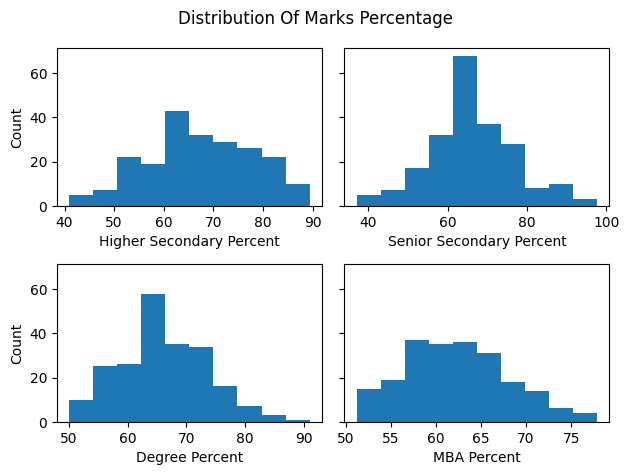

In [11]:
fig, ax = plt.subplots(2, 2, sharey=True)
ax[0, 0].hist(df.ssc_p, bins=10)
ax[0, 1].hist(df.hsc_p, bins=10)
ax[1, 0].hist(df.degree_p, bins=10)
ax[1, 1].hist(df.mba_p, bins=10)

ax[0, 0].set_ylabel("Count")
ax[1, 0].set_ylabel("Count")
ax[0, 0].set_xlabel("Higher Secondary Percent")
ax[0, 1].set_xlabel("Senior Secondary Percent")
ax[1, 0].set_xlabel("Degree Percent")
ax[1, 1].set_xlabel("MBA Percent")
fig.suptitle("Distribution Of Marks Percentage")
plt.tight_layout()
plt.show()

In [12]:
for i in df.select_dtypes(include=["object"]):
    print(f"unique values in {i} : {df[i].nunique()} values ")
    print(df[i].unique())
    print()

unique values in gender : 2 values 
['M' 'F']

unique values in ssc_b : 2 values 
['Others' 'Central']

unique values in hsc_b : 2 values 
['Others' 'Central']

unique values in hsc_s : 3 values 
['Commerce' 'Science' 'Arts']

unique values in degree_t : 3 values 
['Sci&Tech' 'Comm&Mgmt' 'Others']

unique values in workex : 2 values 
['No' 'Yes']

unique values in specialisation : 2 values 
['Mkt&HR' 'Mkt&Fin']



In [13]:
def data_stats(df, query_col, target_col, aggregation_func=np.mean, columns_list=None):
    """
    functions describe the basic stats (count, probability) groupby operations based on query column on target column
    """
    print(f"Total placed based on {query_col} \n")
    print(pd.crosstab(df[query_col], df[target_col], margins="True")) # type: ignore
    print("=" * 50)
    print(f"Proportion of placed student based on {query_col} \n")
    print(
        pd.pivot_table(
            data=df,
            index=query_col,
            values=target_col,
            aggfunc=aggregation_func,
            columns=columns_list,
            sort=True,
        )
    )

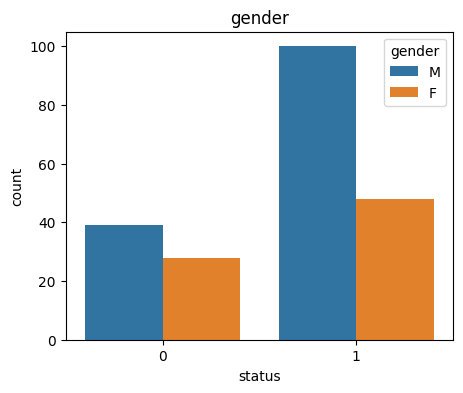

Total placed based on gender 

status   0    1  All
gender              
F       28   48   76
M       39  100  139
All     67  148  215
Proportion of placed student based on gender 

          status
gender          
F       0.631579
M       0.719424


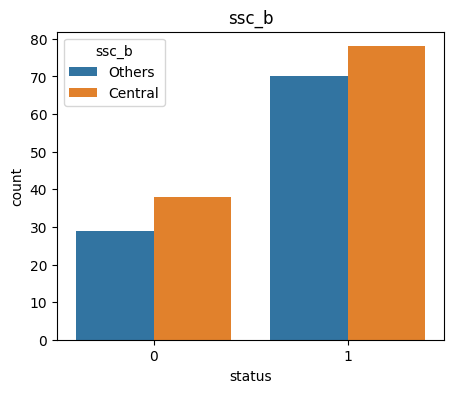

Total placed based on ssc_b 

status    0    1  All
ssc_b                
Central  38   78  116
Others   29   70   99
All      67  148  215
Proportion of placed student based on ssc_b 

           status
ssc_b            
Central  0.672414
Others   0.707071


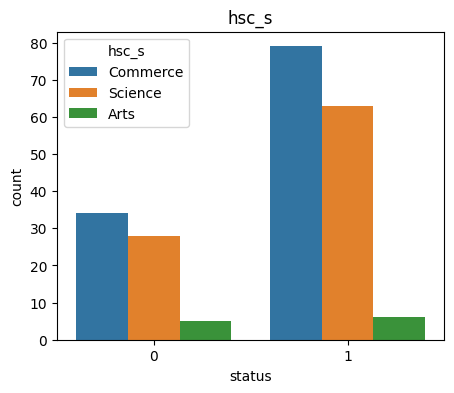

Total placed based on hsc_s 

status     0    1  All
hsc_s                 
Arts       5    6   11
Commerce  34   79  113
Science   28   63   91
All       67  148  215
Proportion of placed student based on hsc_s 

            status
hsc_s             
Arts      0.545455
Commerce  0.699115
Science   0.692308


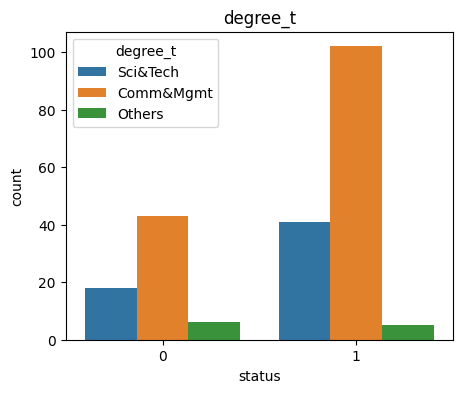

Total placed based on degree_t 

status      0    1  All
degree_t               
Comm&Mgmt  43  102  145
Others      6    5   11
Sci&Tech   18   41   59
All        67  148  215
Proportion of placed student based on degree_t 

             status
degree_t           
Comm&Mgmt  0.703448
Others     0.454545
Sci&Tech   0.694915


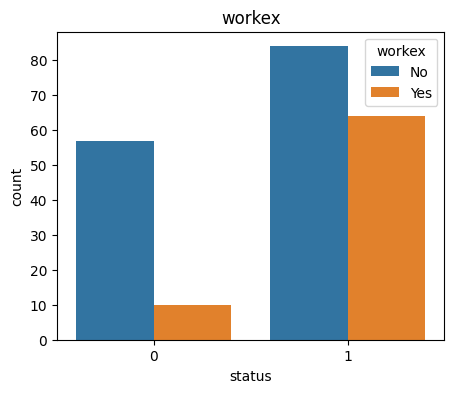

Total placed based on workex 

status   0    1  All
workex              
No      57   84  141
Yes     10   64   74
All     67  148  215
Proportion of placed student based on workex 

          status
workex          
No      0.595745
Yes     0.864865


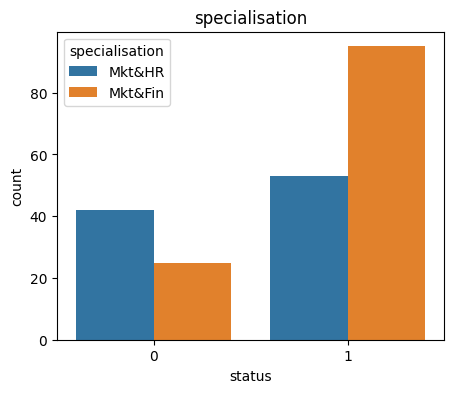

Total placed based on specialisation 

status           0    1  All
specialisation              
Mkt&Fin         25   95  120
Mkt&HR          42   53   95
All             67  148  215
Proportion of placed student based on specialisation 

                  status
specialisation          
Mkt&Fin         0.791667
Mkt&HR          0.557895


In [14]:
col_list = ["gender", "ssc_b", "hsc_s", "degree_t", "workex", "specialisation"]
for g in col_list:
    plt.figure(figsize=(5, 4))
    sns.countplot(
        data=df,
        x="status",
        hue=g,
    )
    plt.title(f"{g}")
    plt.show()
    data_stats(df, g, "status")

<Figure size 640x480 with 0 Axes>

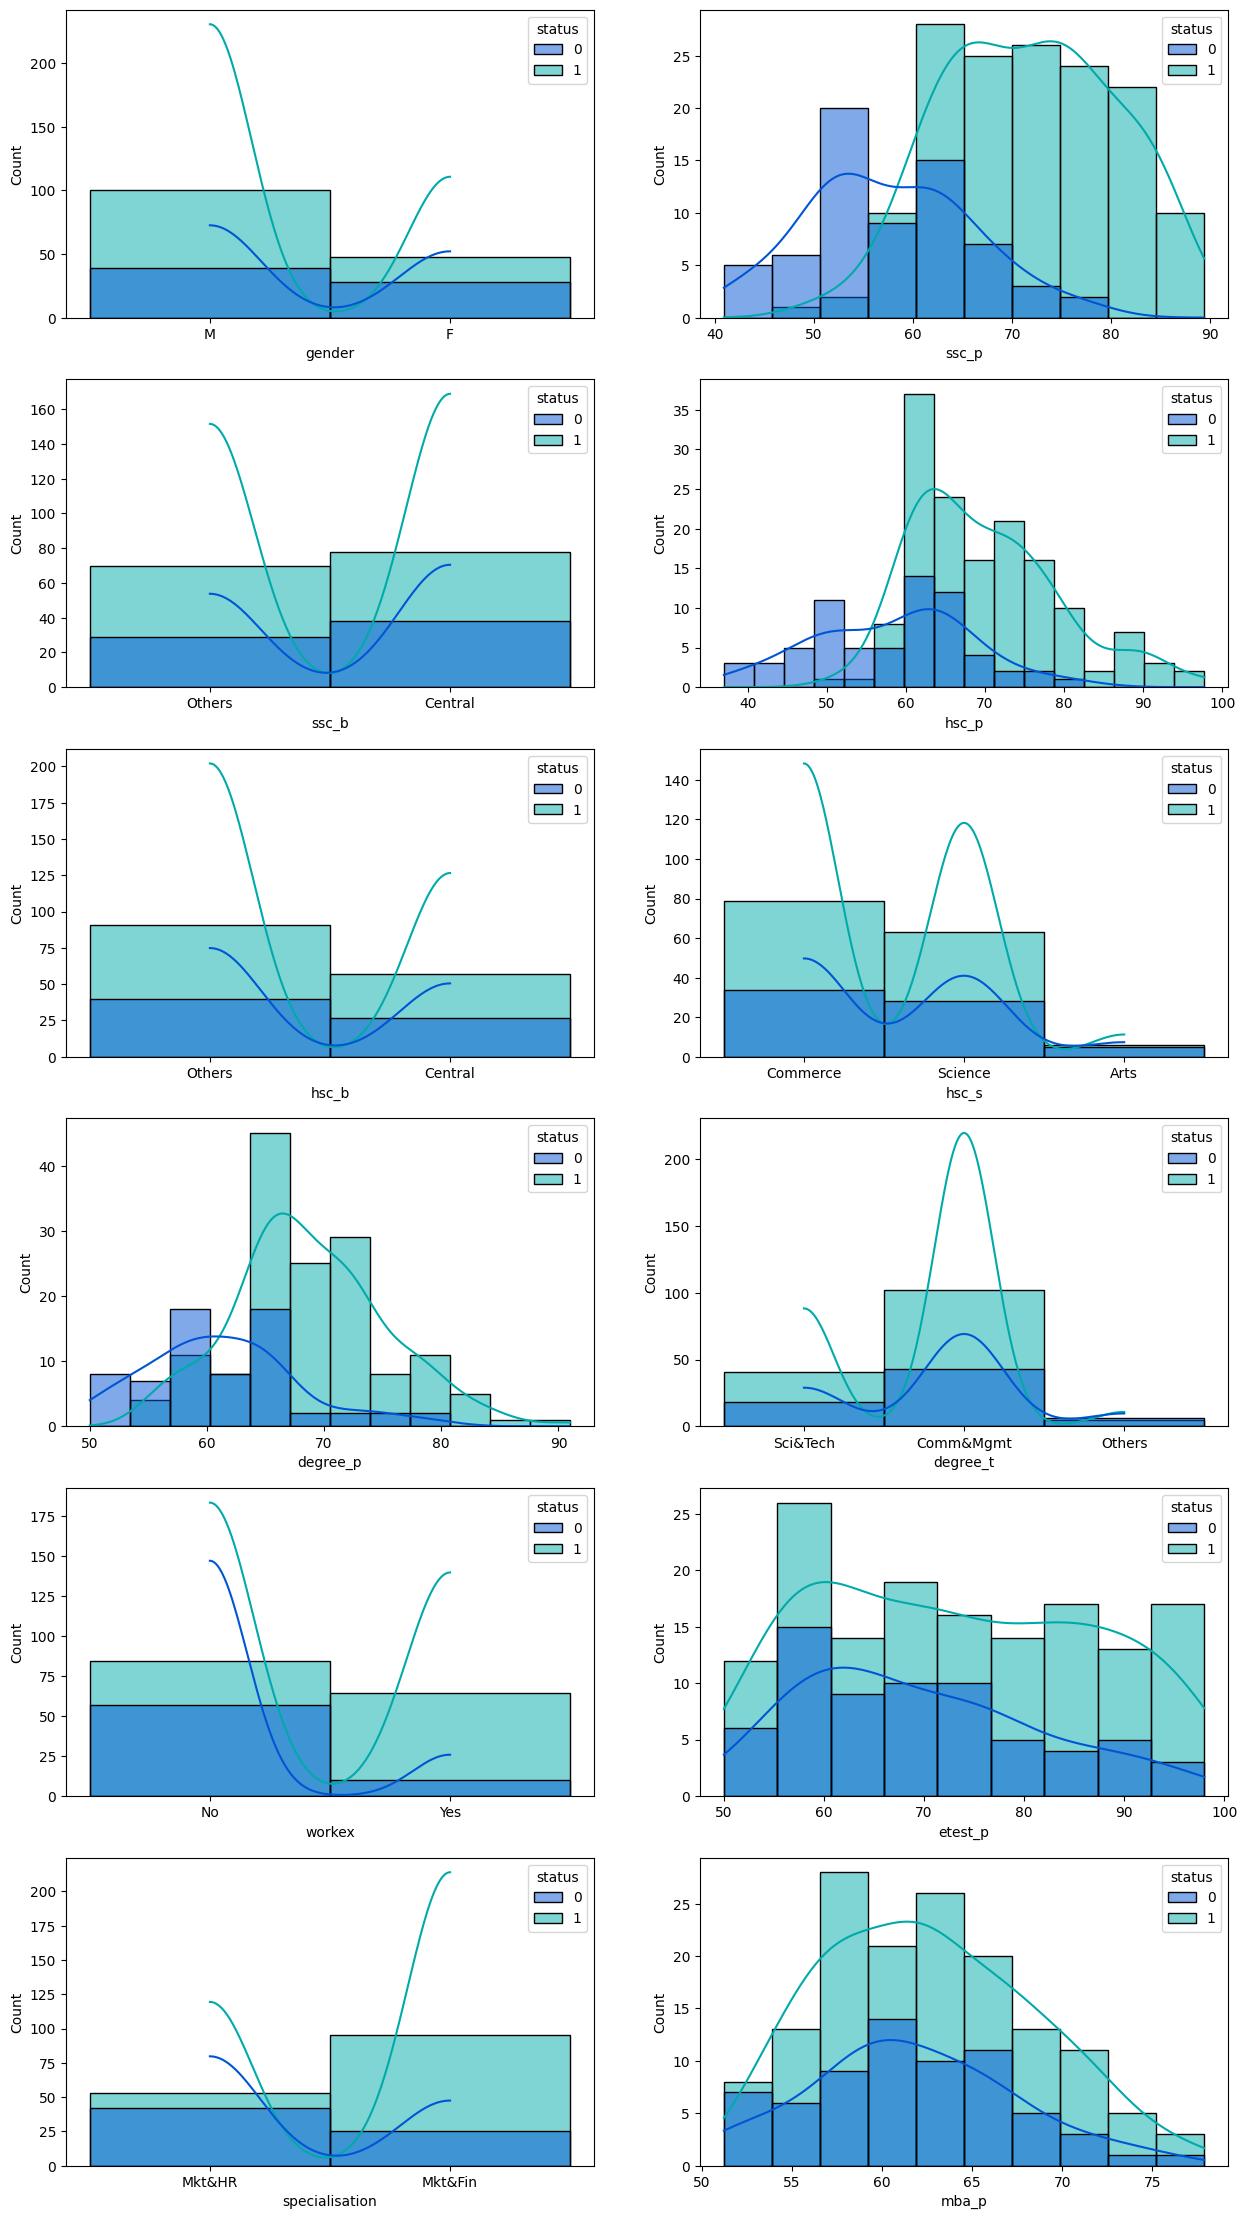

In [15]:
# plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = "winter"

fig, axs = plt.subplots(6, 2, figsize=(15, 28))
i = 1
for feature in df.columns:
    if feature not in ["status"] and i < 14:
        plt.subplot(6, 2, i)
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue="status")
        i += 1

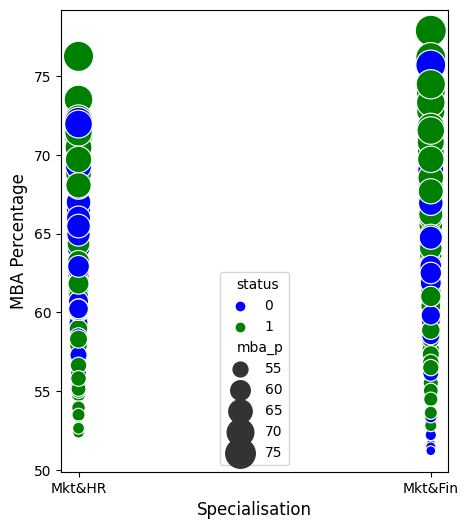

In [16]:
plt.figure(figsize=(5, 6))
colors = ["b", "g"]
sns.scatterplot(
    data=df,
    x="specialisation",
    y="mba_p",
    hue="status",
    palette=colors,
    size="mba_p",
    sizes=(50, 500),
)

plt.xlabel("Specialisation", fontsize=12)
plt.ylabel("MBA Percentage", fontsize=12)
plt.show()

In [17]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


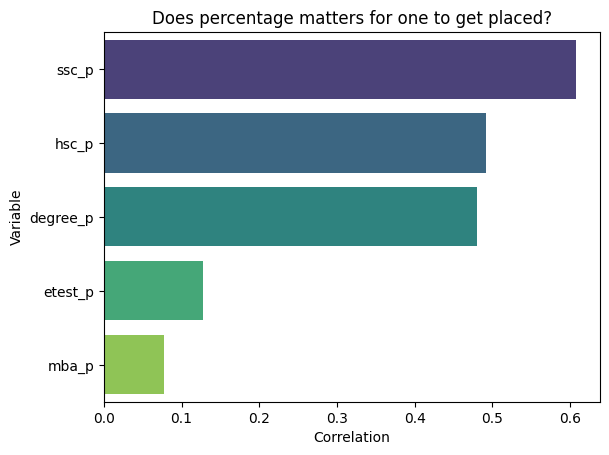

In [18]:
corr = df.corr(numeric_only=True)["status"][:-1]

sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Does percentage matters for one to get placed?")
plt.xlabel("Correlation")
plt.ylabel("Variable")
plt.show()

<Axes: >

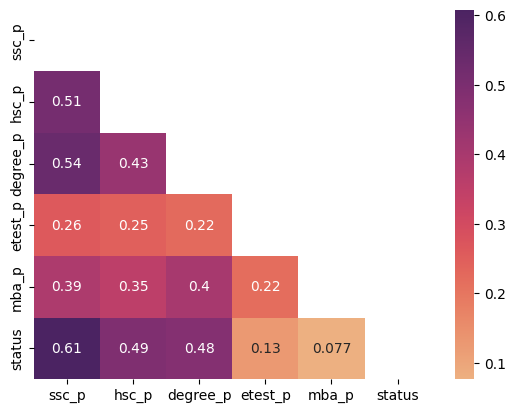

In [19]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, mask=np.triu(corr), annot=True, cmap="flare")

In [20]:
np.bincount(df.status)

array([ 67, 148], dtype=int64)

In [21]:
# base line model accuracy
round(148 / 215, 2)

0.69

## Modeling

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns="status")
y = df["status"]

In [24]:
categorical_features = [d for d in X.columns if X[d].dtype == "object"]
numeric_features = [d for d in X.columns if X[d].dtype != "object"]

In [25]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[("preprocessing", preprocessor)])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

In [27]:
X_train.shape, X_test.shape

((172, 12), (43, 12))

In [28]:
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [29]:
# AUC purpose
X_processed = pipeline.fit_transform(X)

## `Logistic Regression Model`

In [30]:
# logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_processed, y_train)

LogisticRegression()

In [31]:
y_pred = logreg.predict(X_test_processed)

In [32]:
print(
    f"Accuracy of logistic Regression Model is : {metrics.accuracy_score(y_test, y_pred)}"
)
print(
    f"Precision of logistic Regression Model is : {metrics.precision_score(y_test, y_pred)}"
)
print(
    f"Recall of logistic Regression Model is : {metrics.recall_score(y_test, y_pred)}"
)
print(f"f1_score of logistic Regression Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of logistic Regression Model is : 0.8837209302325582
Precision of logistic Regression Model is : 0.8787878787878788
Recall of logistic Regression Model is : 0.9666666666666667
f1_score of logistic Regression Model is : 0.9206349206349207


In [33]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 9  4]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.88      0.97      0.92        30

    accuracy                           0.88        43
   macro avg       0.89      0.83      0.85        43
weighted avg       0.89      0.88      0.88        43



In [34]:
# AUC using cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.92307692 0.89230769 0.97435897 0.94334975 0.92857143]


## `Random Forest Model`


In [35]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_processed, y_train)
y_pred = forest.predict(X_test_processed)

In [36]:
print(f"Accuracy of Random Forest Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(
    f"Precision of Random Forest Model is : {metrics.precision_score(y_test, y_pred)}"
)
print(f"Recall of Random Forest Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of Random Forest Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of Random Forest Model is : 0.8604651162790697
Precision of Random Forest Model is : 0.8529411764705882
Recall of Random Forest Model is : 0.9666666666666667
f1_score of Random Forest Model is : 0.90625


In [37]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 8  5]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



In [38]:
cv_scores = cross_val_score(forest, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.97820513 0.83461538 0.93076923 0.87438424 0.90147783]


## `SVM`

In [39]:
svc = SVC()
svc.fit(X_train_processed, y_train)
y_pred = svc.predict(X_test_processed)

In [40]:
print(f"Accuracy of SVM Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of SVM Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of SVM Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of SVM Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of SVM Model is : 0.8837209302325582
Precision of SVM Model is : 0.8571428571428571
Recall of SVM Model is : 1.0
f1_score of SVM Model is : 0.923076923076923


In [41]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 8  5]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.92        30

    accuracy                           0.88        43
   macro avg       0.93      0.81      0.84        43
weighted avg       0.90      0.88      0.87        43



In [42]:
cv_scores = cross_val_score(svc, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.92564103 0.87948718 0.95128205 0.89655172 0.92364532]


## `Decision Tree`  

In [43]:
tree = DecisionTreeClassifier()
tree.fit(X_train_processed, y_train)
y_pred = tree.predict(X_test_processed)

In [44]:
print(f"Accuracy of tree Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of tree Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of tree Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of tree Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of tree Model is : 0.7209302325581395
Precision of tree Model is : 0.8
Recall of tree Model is : 0.8
f1_score of tree Model is : 0.8000000000000002


In [45]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 7  6]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.80      0.80      0.80        30

    accuracy                           0.72        43
   macro avg       0.67      0.67      0.67        43
weighted avg       0.72      0.72      0.72        43



In [46]:
cv_scores = cross_val_score(tree, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.77948718 0.73589744 0.73589744 0.68103448 0.71921182]


## `XGBoost Model `

In [47]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_processed, y_train)
y_pred = xgb.predict(X_test_processed)


In [48]:
print(f"Accuracy of XGB Model is : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision of XGB Model is : {metrics.precision_score(y_test, y_pred)}")
print(f"Recall of XGB Model is : {metrics.recall_score(y_test, y_pred)}")
print(f"f1_score of XGB Model is : {metrics.f1_score(y_test, y_pred)}")

Accuracy of XGB Model is : 0.8604651162790697
Precision of XGB Model is : 0.9
Recall of XGB Model is : 0.9
f1_score of XGB Model is : 0.9


In [49]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[10  3]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [50]:
cv_scores = cross_val_score(xgb, X_processed, y, cv=5, scoring="roc_auc")
print(cv_scores)

[0.95384615 0.86410256 0.95897436 0.86699507 0.9408867 ]
